In [1]:
#import mysql.connector as sql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

%matplotlib inline

db_connection = sql.connect(host = '127.0.0.1', database = 'dataset1', user = 'root' , password = 'ashutosh49')
df1=pd.read_sql('SELECT * FROM telcomcustomerchurn_1', con=db_connection)

df1=df1.drop(df1[['telcomcustomerchurn_1_id']],axis=1)
df1

df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df1

### Since the data from telcomcustomer-churn_2 cannot be opened in MySQL, we will be directly importing the data from the .csv file.

df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df2

print(df1.shape)
print(df2.shape)
print(df1.size)
print(df2.size)

df=pd.merge(df1,df2,left_index=True, right_index=True)
df

In [2]:
df = pd.read_csv('TelcomCustomer-Churn.csv')

In [3]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,0515-YPMCW,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# data cleansing

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,0515-YPMCW,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
print(df.gender.value_counts())
print(df.SeniorCitizen.value_counts())
print(df.Partner.value_counts())
print(df.Dependents.value_counts())
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.DeviceProtection.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())
print(df.Contract.value_counts())
print(df.PaperlessBilling.value_counts())
print(df.PaymentMethod.value_counts())
print(df.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [9]:
replaceStruct= {
    "gender" : {"Female" : 0, "Male" : 1},
    "Partner" : {"No": 0, "Yes": 1},
    "Dependents" : {"No": 0, "Yes": 1},
    "PhoneService" : {"No": 0, "Yes": 1},
    "MultipleLines" : {"No": 0, "Yes": 1, "No phone service" : 0},
    "InternetService" : {"No" :0, "DSL" : 1 , "Fiber optic" : 2},
    "OnlineSecurity" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "OnlineBackup" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "DeviceProtection" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "TechSupport" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "StreamingTV" : {"No" : 0 , "Yes" : 1, "No internet service" : 0},
    "StreamingMovies" : {"No" : 0 , "Yes" : 1 , "No internet service" : 0},
    "Contract" : {"Month-to-month": 0 , "One year" : 1 , "Two year" : 2},
    "PaperlessBilling" : {"No": 0, "Yes": 1},
    "PaymentMethod" : {"Electronic check" : 0 , "Mailed check" : 1, "Bank transfer (automatic)" : 2 , "Credit card (automatic)" : 3},
    "Churn" : {"No": 0, "Yes": 1}
}

In [10]:
df=df.replace(replaceStruct)

In [11]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,1,1,0,1,0,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,0,1,0,0,1,3,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,1,...,0,0,0,0,0,0,1,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,1,1,1,0,1,0,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,0,0,0,1,0,2,56.15,3487.95,0


Since the column of customerID will not provide any meaningful insight in the data, we will drop the column.

In [12]:
df=df.drop(df[['customerID']],axis=1)

The data type of the TotalCharges column is object. So, we convert it to float64. And fill the missing values with the mean of the data.

In [13]:
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges=df.TotalCharges.fillna(np.mean(df.TotalCharges))

# Data analysis & visualisation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<AxesSubplot:xlabel='tenure', ylabel='Count'>

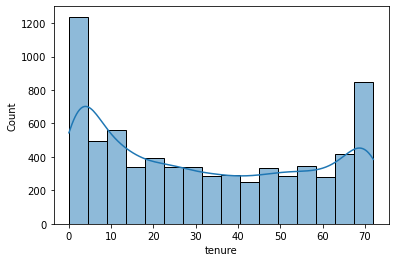

In [15]:
sns.histplot(df.tenure,kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

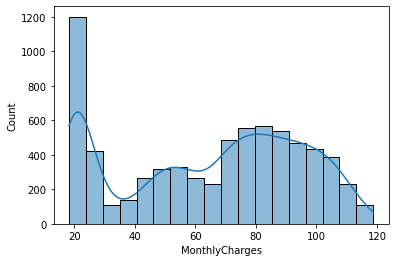

In [16]:
sns.histplot(df.MonthlyCharges,kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

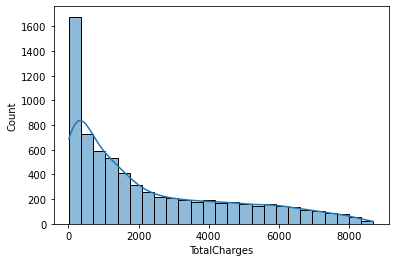

In [17]:
sns.histplot(df.TotalCharges,kde=True)

bivariate

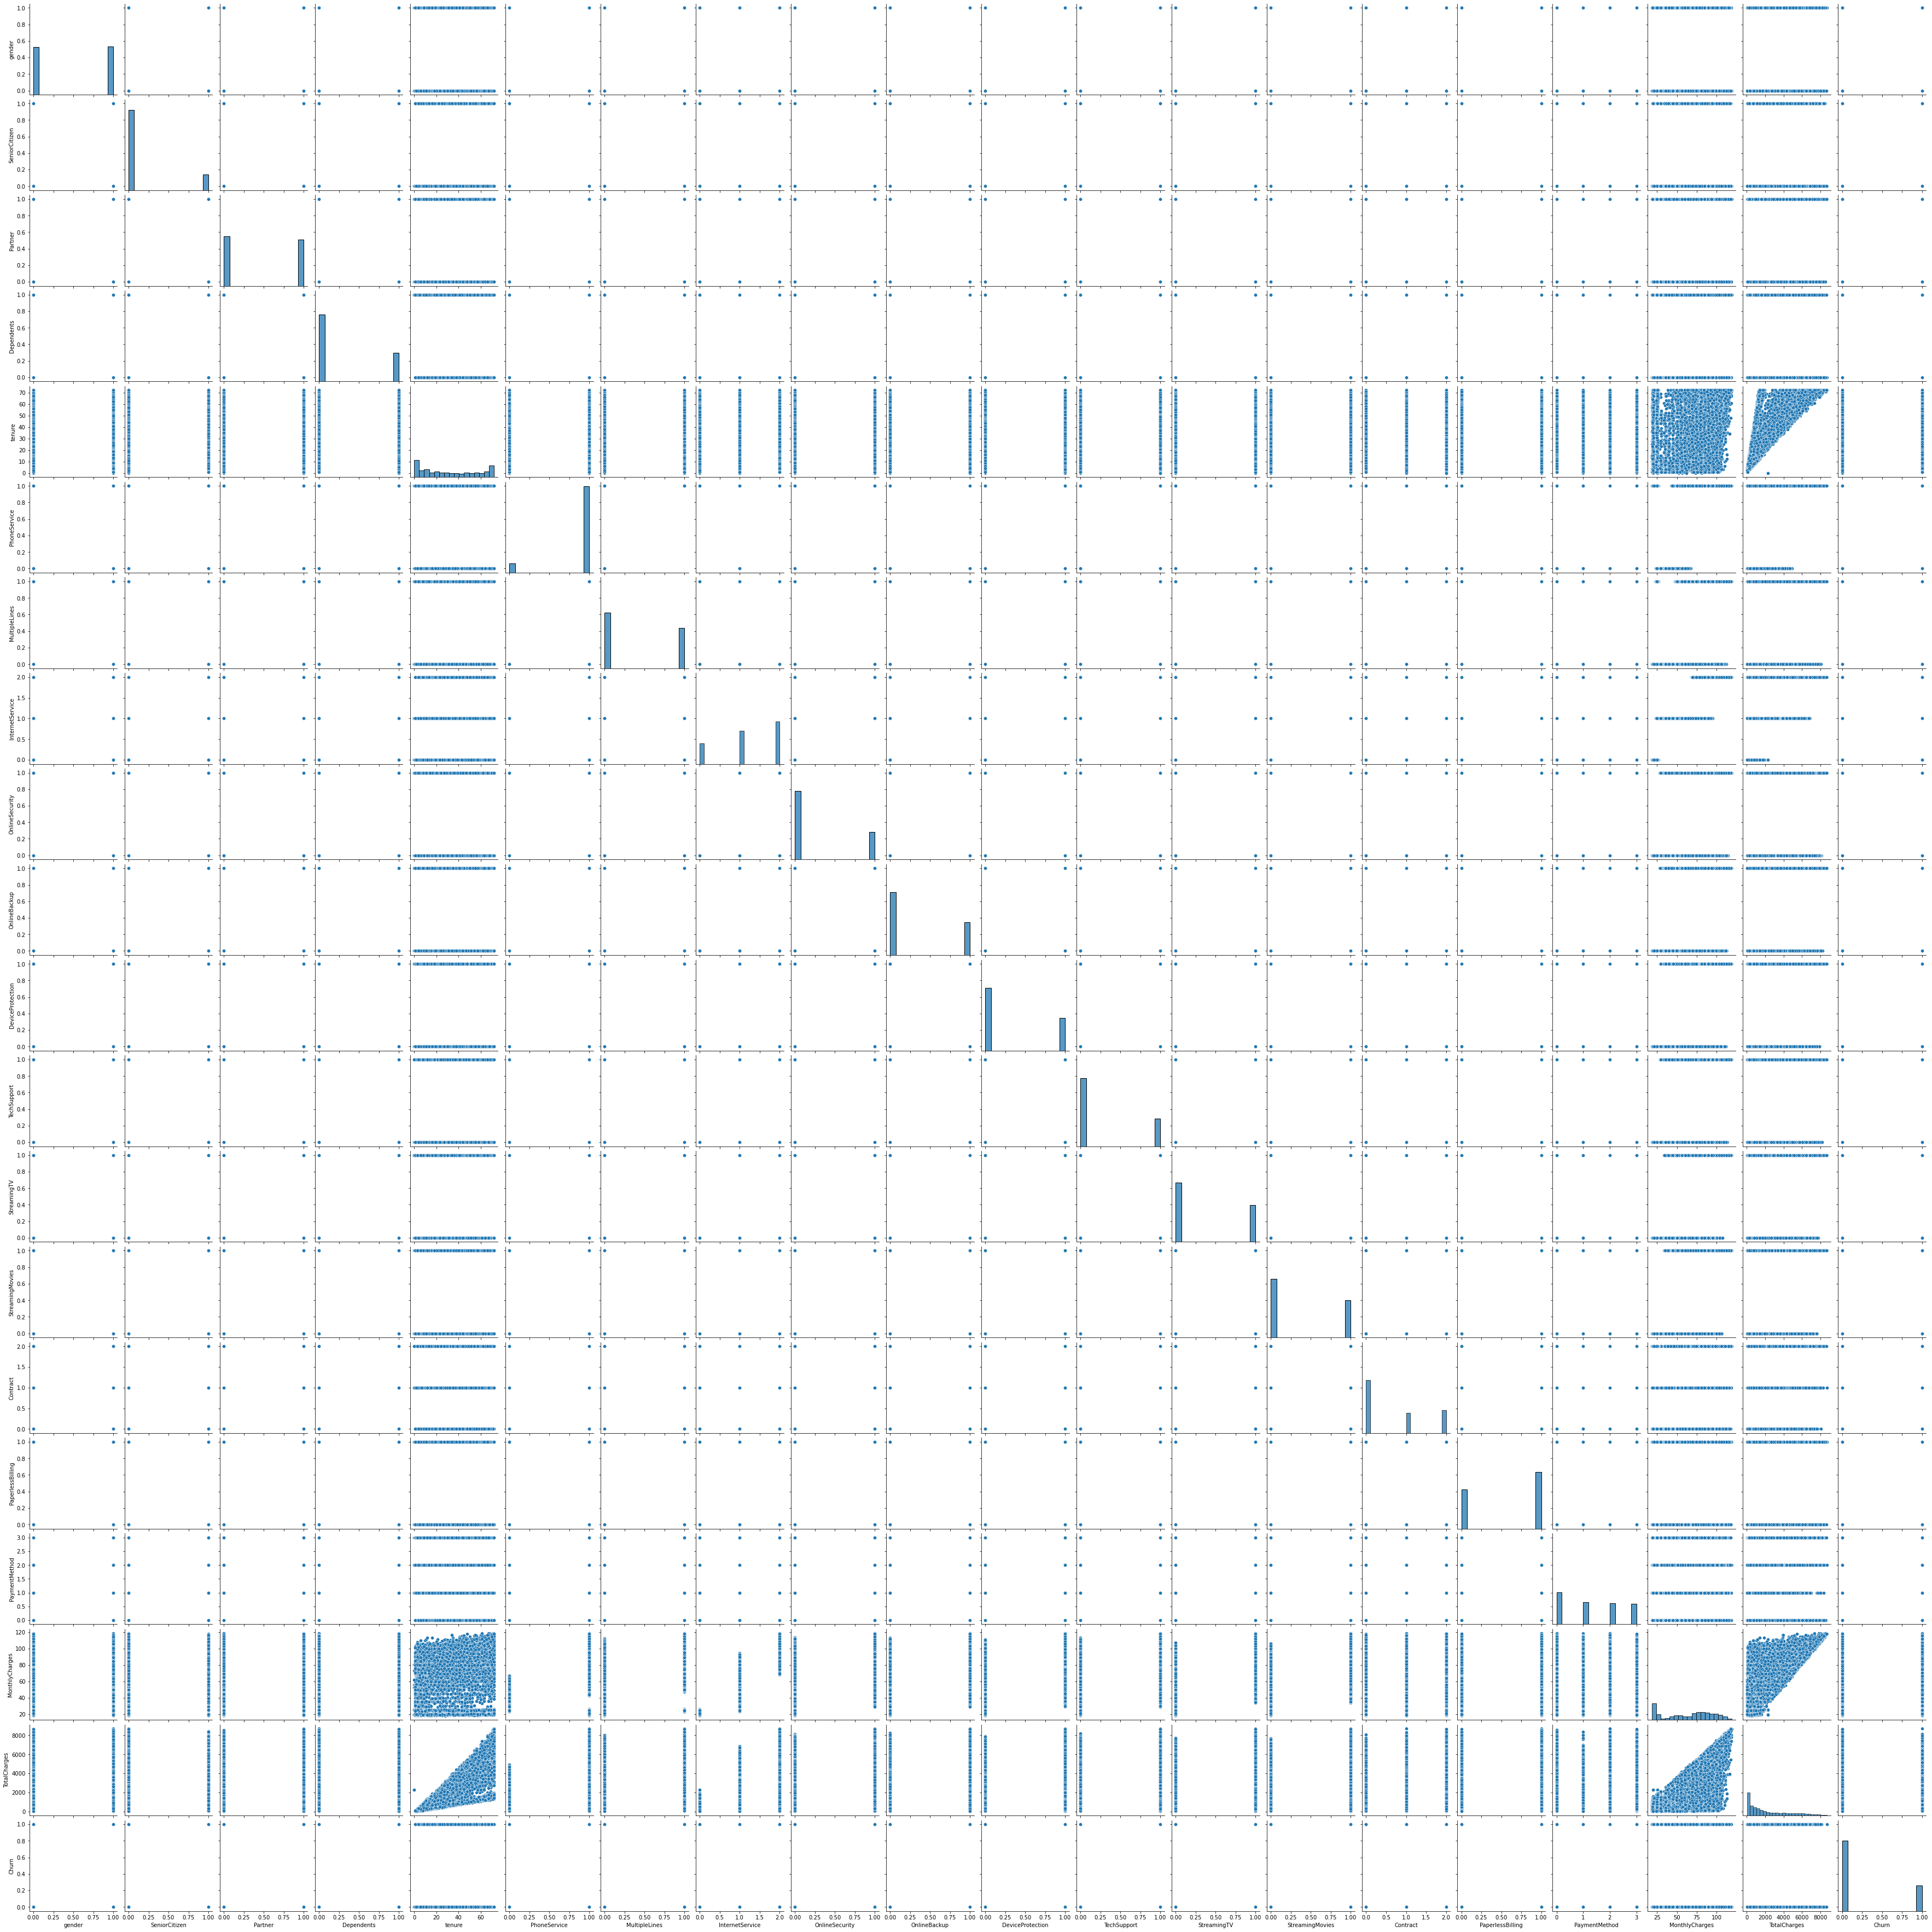

In [18]:
sns.pairplot(df)

In [19]:
correl=df.corr()
correl

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.112851,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468689,0.040102
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.427749,0.316846
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509692,-0.082255


<AxesSubplot:>

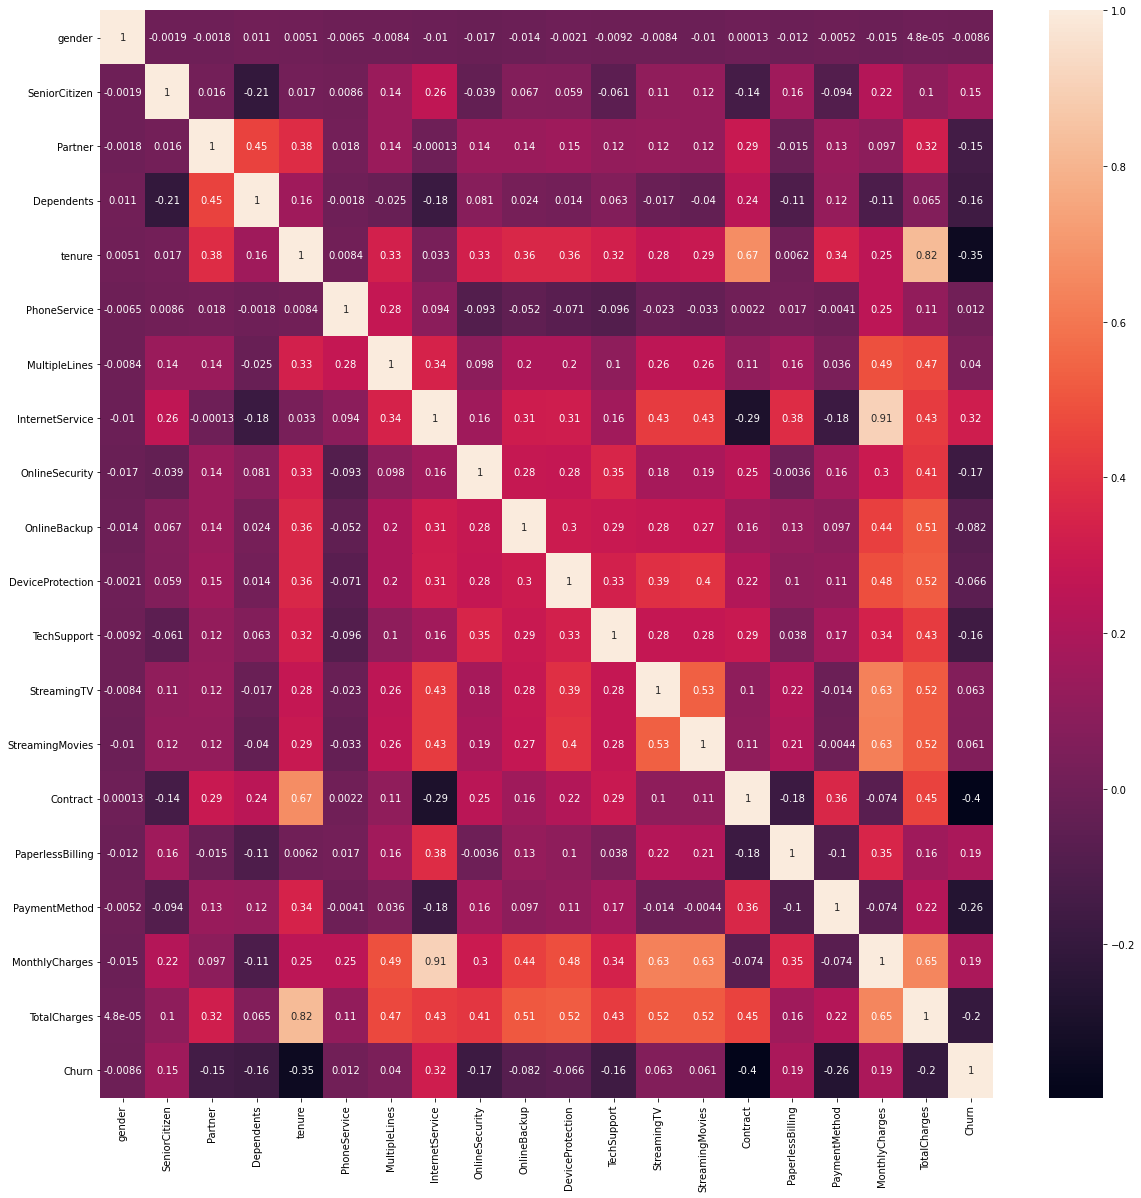

In [20]:
plt.subplots(figsize=(20,20))
sns.heatmap(correl,annot=True)

In [21]:
X=df.drop(df[['Churn']],axis=1)
y=df[['Churn']]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [23]:
from sklearn.tree import DecisionTreeClassifier

dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [24]:
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

0.9979716024340771
0.7207761476573592


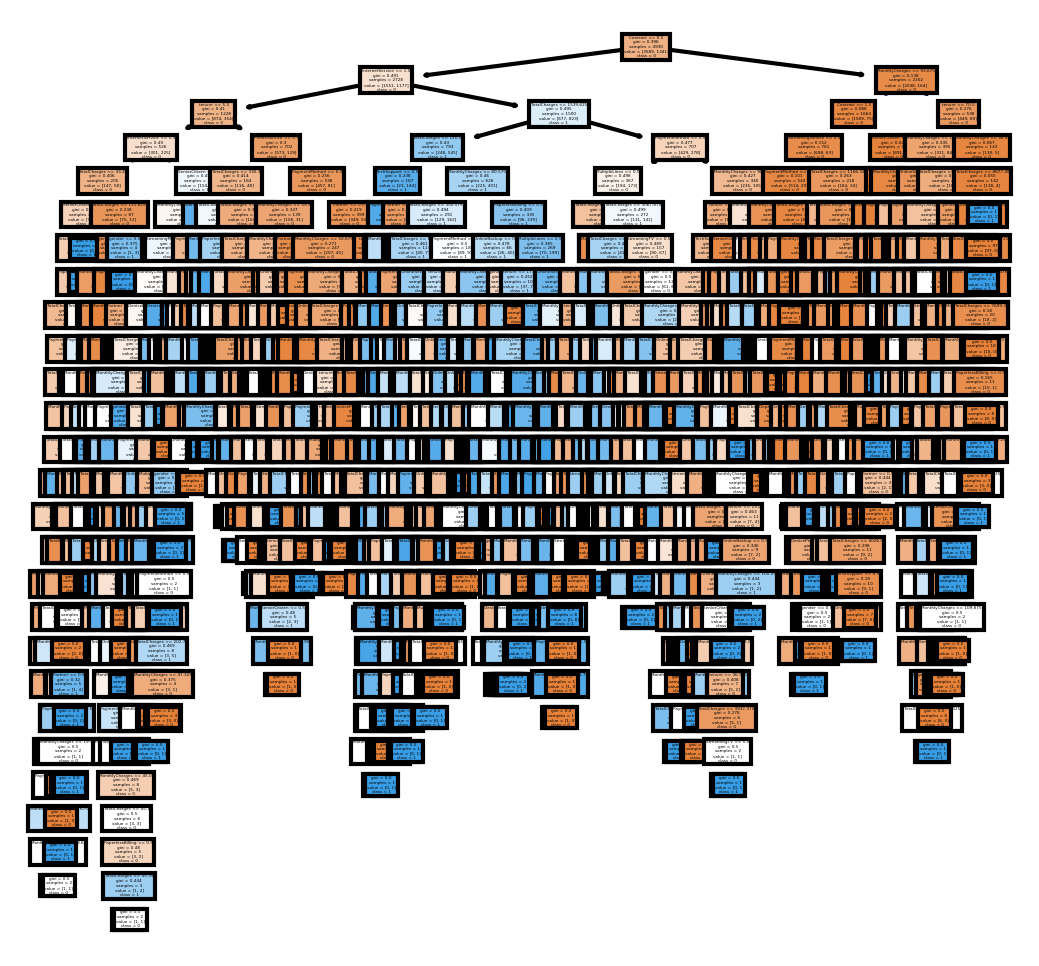

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=list(X_train)
cn=["0","1"]
fig,axes=plt.subplots(nrows =1, ncols=1, figsize=(4,4),dpi=300)
plot_tree(dTree,feature_names = fn, class_names=cn, filled= True)
fig.savefig("dtree.png")

In [26]:
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.025630
SeniorCitizen     0.020211
Partner           0.026559
Dependents        0.017620
tenure            0.090914
PhoneService      0.003204
MultipleLines     0.014377
InternetService   0.055497
OnlineSecurity    0.016199
OnlineBackup      0.018723
DeviceProtection  0.016632
TechSupport       0.019530
StreamingTV       0.015933
StreamingMovies   0.008560
Contract          0.162867
PaperlessBilling  0.017909
PaymentMethod     0.048859
MonthlyCharges    0.206119
TotalCharges      0.214658


In [27]:
decTree=DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)
decTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [28]:
print(decTree.score(X_train,y_train))
print(decTree.score(X_test,y_test))

0.7910750507099391
0.7950780880265026


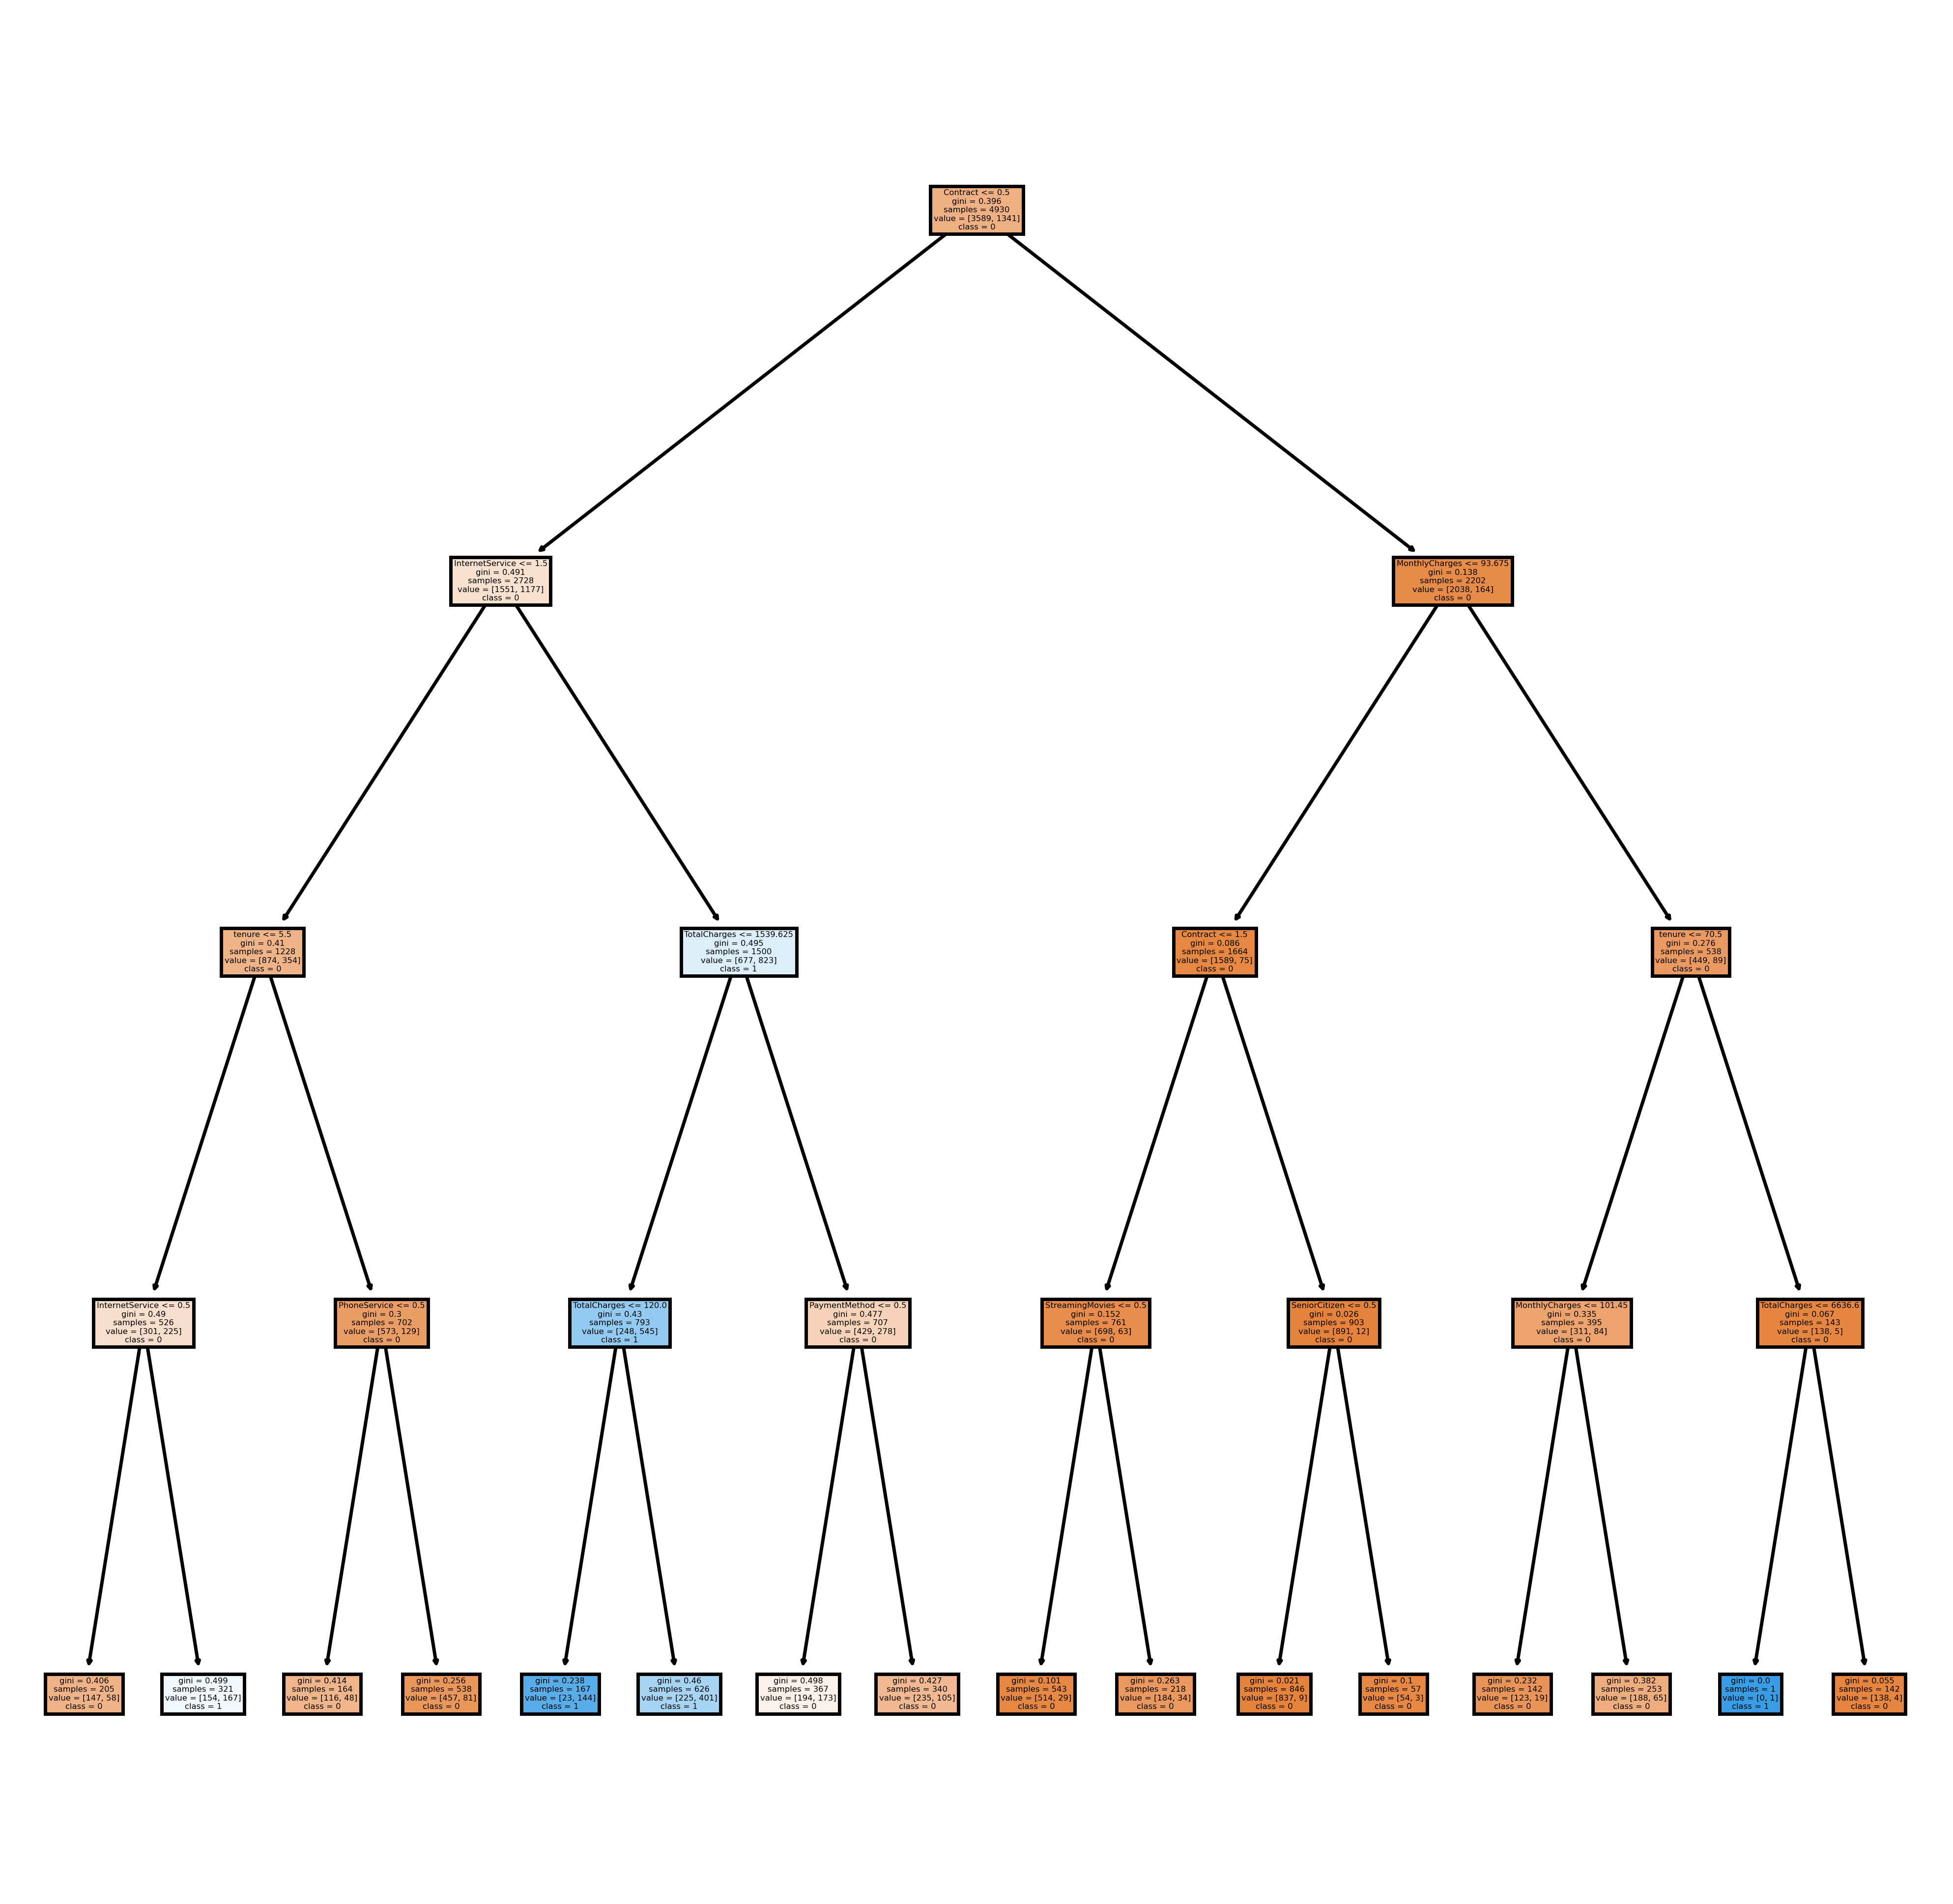

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn=X_train.columns
cn=["0","1"]
fig,axes=plt.subplots(nrows =1, ncols=1, figsize=(10,10),dpi=500)
plot_tree(decTree,feature_names = fn, class_names=cn, filled= True)
fig.savefig("dectree.png")

In [30]:
print (pd.DataFrame(decTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
gender            0.000000
SeniorCitizen     0.000328
Partner           0.000000
Dependents        0.000000
tenure            0.073862
PhoneService      0.008838
MultipleLines     0.000000
InternetService   0.183915
OnlineSecurity    0.000000
OnlineBackup      0.000000
DeviceProtection  0.000000
TechSupport       0.000000
StreamingTV       0.000000
StreamingMovies   0.005696
Contract          0.547488
PaperlessBilling  0.000000
PaymentMethod     0.016238
MonthlyCharges    0.025301
TotalCharges      0.138334


<AxesSubplot:>

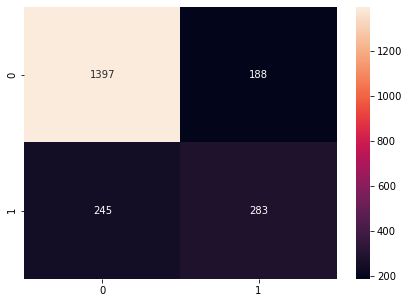

In [31]:
from sklearn.metrics import confusion_matrix
y_predict = decTree.predict(X_test)
cm=confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm,index = [i for i in ["0","1"]],columns = [i for i in ["0","1"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt= 'g')

# Ensemble Learning - Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=decTree,n_estimators=50, random_state=1)
bgcl = bgcl.fit(X_train,y_train)

C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7957403651115619
0.7993374349266446


<AxesSubplot:>

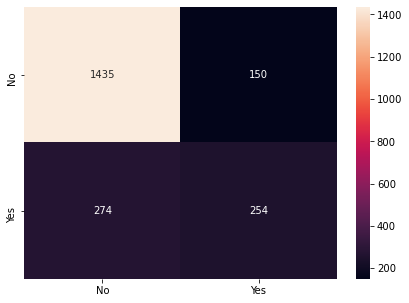

In [33]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_train,y_train))
print(bgcl.score(X_test,y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [34]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(max_depth=3)
abcl = AdaBoostClassifier(base_estimator =tree,n_estimators=100, learning_rate =1.5,algorithm="SAMME", random_state=1)
abcl = abcl.fit(X_train, y_train)
print(abcl)

C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5, n_estimators=100, random_state=1)


0.8192697768762678
0.804070042593469


<AxesSubplot:>

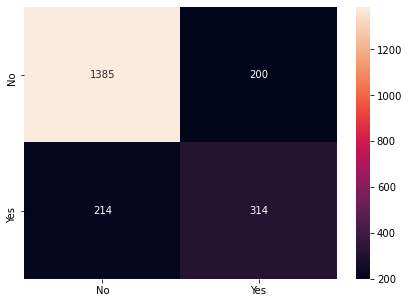

In [35]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [36]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [37]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME.R")

In [38]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [39]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.804184,0.019901,0.066157,0.004016,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.771856,0.781876,0.759638,0.771123,0.009094,4,0.955681,0.952844,0.959998,0.956174,0.002941
1,1.663149,0.058963,0.122338,0.007690,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.742012,0.746515,0.723677,0.737401,0.009877,5,0.990411,0.987814,0.989895,0.989373,0.001123
2,2.331423,0.068676,0.183853,0.002859,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.729506,0.718901,0.726089,0.724832,0.004420,6,0.999087,0.998734,0.998769,0.998863,0.000159
3,1.416816,0.053951,0.069139,0.002484,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.782175,0.786696,0.782953,0.783941,0.001973,2,0.999999,0.999994,0.999985,0.999993,0.000006
4,2.639626,0.056188,0.133986,0.007404,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.778923,0.787895,0.768056,0.778291,0.008111,3,0.999999,0.999994,0.999985,0.999993,0.000006
5,3.422907,0.048985,0.184857,0.007020,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.780759,0.792139,0.780559,0.784485,0.005412,1,0.999999,0.999994,0.999985,0.999993,0.000006


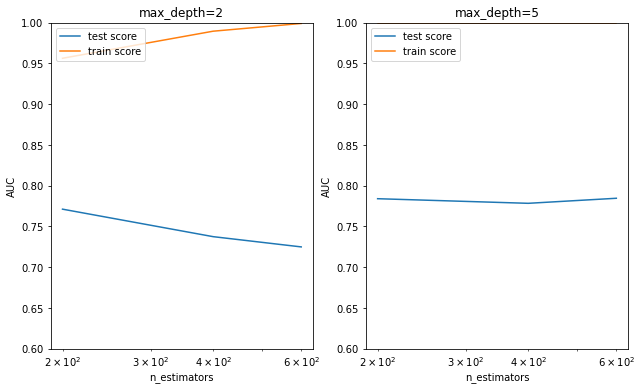

In [41]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


# Ensemble Learning - GradientBoost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8156186612576065
0.8017037387600567


<AxesSubplot:>

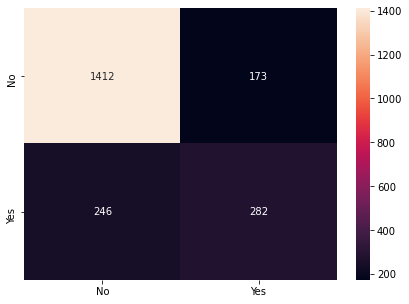

In [43]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [44]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [45]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [46]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [47]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.315575,0.006150,0.006981,1.123916e-07,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.819162,0.831730,0.817186,0.822693,0.006441,3,0.886810,0.881770,0.885360,0.884647,0.002119
1,0.458445,0.022561,0.007657,1.256365e-03,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.825160,0.839679,0.824762,0.829867,0.006940,2,0.900756,0.896529,0.902273,0.899853,0.002430
2,0.539224,0.013862,0.006316,4.704155e-04,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.825708,0.841206,0.825975,0.830963,0.007244,1,0.908227,0.899169,0.905983,0.904460,0.003851
3,0.328767,0.018887,0.007325,1.241205e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.794012,0.790672,0.775598,0.786761,0.008010,6,0.858328,0.857870,0.891677,0.869292,0.015830
4,0.461466,0.024531,0.008312,2.617343e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.797565,0.813709,0.801433,0.804236,0.006882,4,0.923391,0.923327,0.904402,0.917040,0.008937


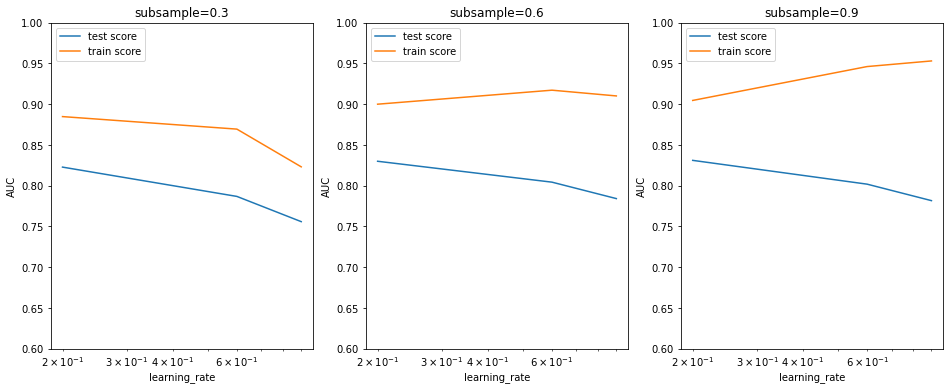

In [48]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


# Ensemble Learning - RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9973630831643002
0.7983909133932797


<AxesSubplot:>

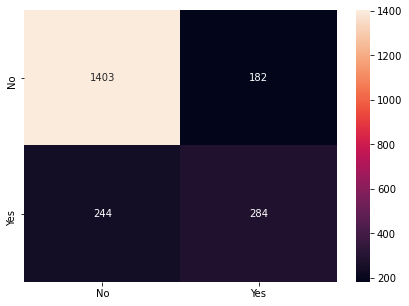

In [50]:
y_predict = rfcl.predict(X_test)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### XGBoost

Let's finally try XGBoost. The hyperparameters are the same, some important ones being ```subsample```, ```learning_rate```, ```max_depth``` etc.


In [51]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier()

In [52]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.91254485, 0.08745517],
       [0.8333974 , 0.16660258],
       [0.80117196, 0.19882803],
       [0.5203882 , 0.4796118 ],
       [0.84842265, 0.15157738],
       [0.9264842 , 0.0735158 ],
       [0.6735945 , 0.3264055 ],
       [0.31392652, 0.6860735 ],
       [0.8516786 , 0.14832138],
       [0.8134416 , 0.18655844]], dtype=float32)

In [53]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 85.72%


The roc_auc in this case is about 0.95% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost hyperparameters is here: http://xgboost.readthedocs.io/en/latest/parameter.html


Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [54]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [55]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.261965,0.012473,0.008643,4.697412e-04,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.815989,0.842605,0.816369,0.824988,0.012459,3,0.885529,0.879232,0.890241,0.885001,0.004510
1,0.293216,0.012073,0.008310,4.691227e-04,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.826922,0.839203,0.825310,0.830478,0.006204,2,0.893417,0.887794,0.897767,0.892993,0.004082
2,0.253987,0.008642,0.007647,4.701907e-04,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.827238,0.841177,0.823639,0.830685,0.007563,1,0.896287,0.892544,0.900628,0.896486,0.003303
3,0.274766,0.010699,0.009328,9.316317e-04,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.781912,0.802041,0.776381,0.786778,0.011026,6,0.890055,0.885463,0.891721,0.889080,0.002646
4,0.305173,0.011489,0.008977,8.153670e-04,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.800308,0.824381,0.801621,0.808770,0.011052,5,0.917220,0.908768,0.924054,0.916680,0.006252
5,0.257312,0.008462,0.007979,5.619580e-07,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.803928,0.825486,0.801793,0.810402,0.010701,4,0.932681,0.927234,0.935940,0.931952,0.003591


In [57]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.261965,0.012473,0.008643,0.000470,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.815989,0.842605,0.816369,0.824988,0.012459,3,0.885529,0.879232,0.890241,0.885001,0.004510
1,0.293216,0.012073,0.008310,0.000469,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.826922,0.839203,0.825310,0.830478,0.006204,2,0.893417,0.887794,0.897767,0.892993,0.004082
2,0.253987,0.008642,0.007647,0.000470,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.827238,0.841177,0.823639,0.830685,0.007563,1,0.896287,0.892544,0.900628,0.896486,0.003303
3,0.274766,0.010699,0.009328,0.000932,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.781912,0.802041,0.776381,0.786778,0.011026,6,0.890055,0.885463,0.891721,0.889080,0.002646
4,0.305173,0.011489,0.008977,0.000815,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.800308,0.824381,0.801621,0.808770,0.011052,5,0.917220,0.908768,0.924054,0.916680,0.006252


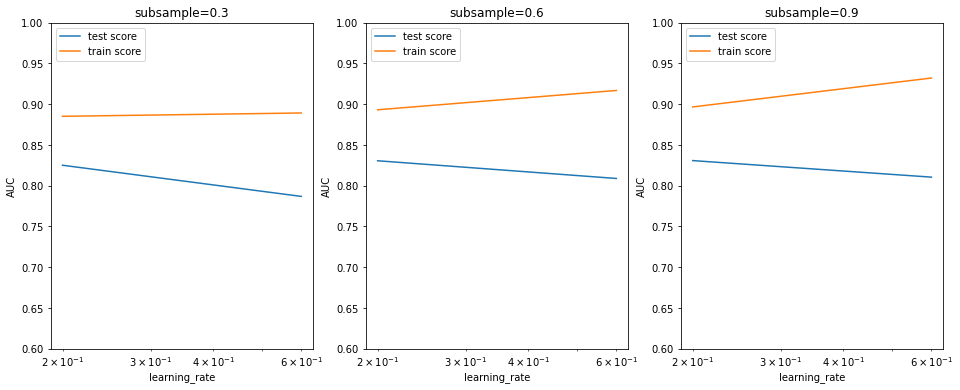

In [58]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [59]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

C:\Users\ac253\anaconda3\envs\xgboost\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

In [60]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.91254485, 0.08745517],
       [0.8333974 , 0.16660258],
       [0.80117196, 0.19882803],
       [0.5203882 , 0.4796118 ],
       [0.84842265, 0.15157738],
       [0.9264842 , 0.0735158 ],
       [0.6735945 , 0.3264055 ],
       [0.31392652, 0.6860735 ],
       [0.8516786 , 0.14832138],
       [0.8134416 , 0.18655844]], dtype=float32)

The first column in y_pred is the P(0), i.e. P(not fraud), and the second column is P(1/fraud).

In [61]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8572340120447376

Finally, let's also look at the feature importances.

In [62]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'gender': 0.010243475,
 'SeniorCitizen': 0.023311362,
 'Partner': 0.0031579235,
 'Dependents': 0.010801986,
 'tenure': 0.058161084,
 'PhoneService': 0.0172409,
 'MultipleLines': 0.027398434,
 'InternetService': 0.17765959,
 'OnlineSecurity': 0.043330874,
 'OnlineBackup': 0.009974398,
 'DeviceProtection': 0.006216519,
 'TechSupport': 0.033809762,
 'StreamingTV': 0.025705423,
 'StreamingMovies': 0.040644687,
 'Contract': 0.35674435,
 'PaperlessBilling': 0.02399198,
 'PaymentMethod': 0.07732078,
 'MonthlyCharges': 0.021663584,
 'TotalCharges': 0.03262288}

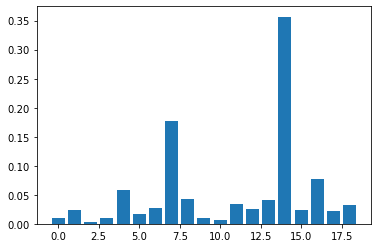

In [63]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()